## Dataset : Personalize Expedia Hotel Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#### Load Dataset

In [2]:
expedia = pd.read_csv('expedia_train.csv')
expedia

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917526,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,154.34,1
9917527,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917528,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


#### Preporcessing :

In [3]:
expedia['prop_id'].value_counts()

104517    4733
124342    4707
68420     4580
134154    4550
40279     4535
          ... 
69676        1
72761        1
48140        1
8565         1
127084       1
Name: prop_id, Length: 136886, dtype: int64

In [16]:
df = expedia.loc[expedia['prop_id'] == 104517] # selecting because it has most data points

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['price_usd'].describe()

count   4733.000
mean     109.967
std      124.661
min        0.070
25%       67.000
50%       95.000
75%      133.000
max     5584.000
Name: price_usd, dtype: float64

In [18]:
df['visitor_location_country_id'].value_counts()

219    3487
100     424
220     184
55      124
216      78
       ... 
70        1
30        1
149       1
133       1
18        1
Name: visitor_location_country_id, Length: 73, dtype: int64

In [19]:
df['srch_length_of_stay'].describe()

count   4733.000
mean       2.703
std        1.757
min        1.000
25%        2.000
50%        2.000
75%        3.000
max       28.000
Name: srch_length_of_stay, dtype: float64

In [20]:
df['srch_booking_window'].describe()

count   4733.000
mean      48.443
std       56.096
min        0.000
25%        9.000
50%       28.000
75%       64.000
max      308.000
Name: srch_booking_window, dtype: float64

In [21]:
df['srch_room_count'].value_counts()

1    4120
2     515
3      74
4      15
6       5
8       3
5       1
Name: srch_room_count, dtype: int64

In [22]:
df = df.loc[df['srch_room_count'] == 1]
df = df.loc[df['visitor_location_country_id'] == 219]

df['date_time'].min(), df['date_time'].max()

('2012-11-01 02:48:30', '2013-06-30 22:50:21')

In [23]:
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 2041 to 9917395
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_time                 3049 non-null   object 
 1   price_usd                 3049 non-null   float64
 2   srch_booking_window       3049 non-null   int64  
 3   srch_saturday_night_bool  3049 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 119.1+ KB


In [25]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values('date_time')
df['price_usd'].describe()

count   3049.000
mean     112.939
std      113.374
min        0.120
25%       67.000
50%      100.000
75%      141.000
max     5584.000
Name: price_usd, dtype: float64

###### One extreme anomaly which has Max price_usd at 5584. After a little bit investigation, I guess it was either a mistake or user seached a presidential suite by accident and had no intention to book or view. In order to find more anomalies that are not extreme, removing this :

In [27]:
expedia.loc[(expedia['price_usd'] == 5584) & (expedia['visitor_location_country_id'] == 219)]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2905344,195154,2013-04-07 20:59:07,5,219,nan,nan,219,104517,4,4.000,...,nan,nan,nan,nan,-1.000,0.000,28.000,0,nan,0


In [15]:
df = df.loc[df['price_usd'] < 5584]

In [19]:
#df.to_csv('TimeSeriesExpedia.csv', index=False)

In [20]:
df['price_usd'].describe()

count   3048.000
mean     111.144
std       55.055
min        0.120
25%       67.000
50%      100.000
75%      141.000
max      536.000
Name: price_usd, dtype: float64

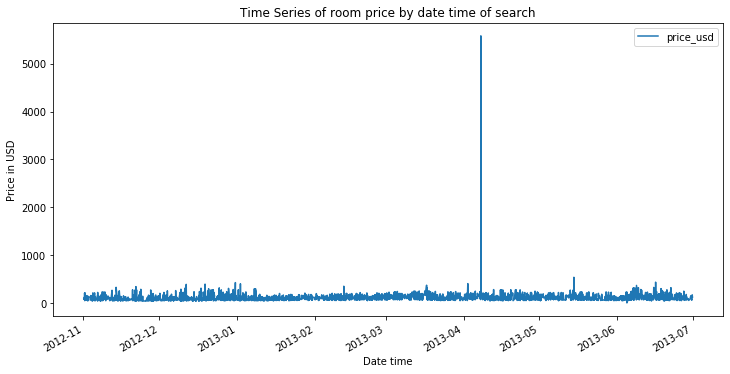

In [28]:
# visualize the rest of the data:

# plot the data
df.plot(x='date_time', y='price_usd', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search');

In [22]:
df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
3945840,2012-11-01 02:48:30,84.000,19,0
63387,2012-11-01 03:06:43,78.000,16,1
3352426,2012-11-01 09:04:18,114.000,56,1
5257418,2012-11-01 09:11:03,76.000,56,1
7091061,2012-11-01 10:15:25,128.000,0,1


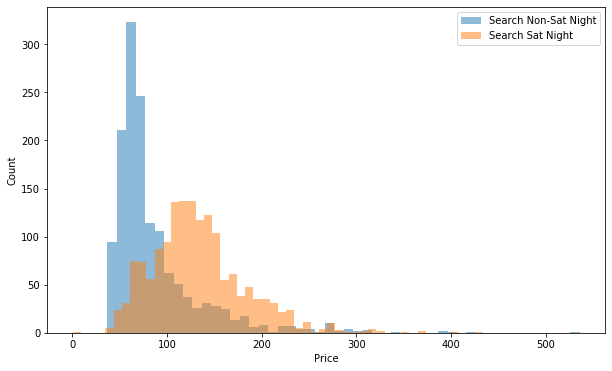

In [23]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show();

#### In general, the price is more stable and lower when searching Non-Saturday night. And the price goes up when searching Saturday night

In [24]:
df['srch_saturday_night_bool'].value_counts()

1    1599
0    1449
Name: srch_saturday_night_bool, dtype: int64

In [25]:
df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
3945840,2012-11-01 02:48:30,84.000,19,0
63387,2012-11-01 03:06:43,78.000,16,1
3352426,2012-11-01 09:04:18,114.000,56,1
5257418,2012-11-01 09:11:03,76.000,56,1
7091061,2012-11-01 10:15:25,128.000,0,1


#### The useful features for our further analysis are "price_usd", "srch_booking_window" and "srch_saturday_night_bool".

### Clustering-Based Anomaly Detection
##### k-means algorithm
###### k-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies. 

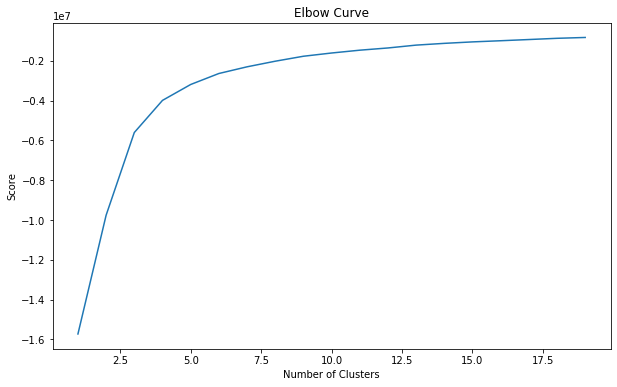

In [36]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

### From the above elbow curve, we see that the graph levels off after 10 clusters, implying that addition of more clusters do not explain much more of the variance in our relevant variable; in this case price_usd.

## we set n_clusters=10, and upon generating the k-means output use the data to plot the 3D clusters:

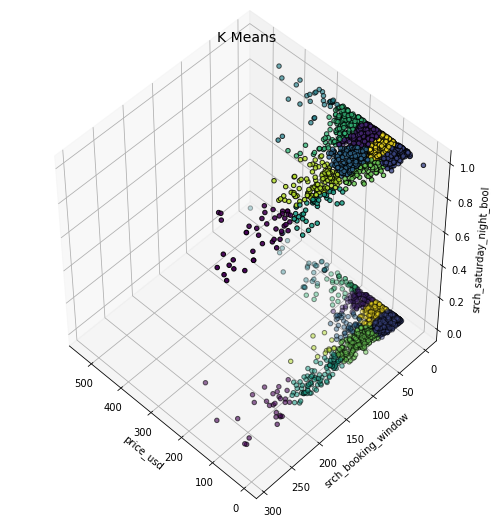

In [37]:
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14);

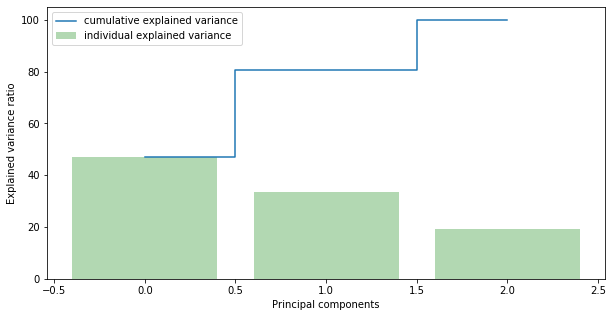

In [38]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

### We see that the first component explains almost 50% of the variance. The second component explains over 30%. However, we've got to notice that almost none of the components are really negligible. The first 2 components contain over 80% of the information. So, we will set n_components=2.

In [39]:
# Take useful feature and standardize them
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [40]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

8    663
9    593
0    429
4    354
3    353
1    212
7    150
5    149
2     79
6     66
Name: cluster, dtype: int64

In [41]:
df.head()


,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,cluster,principal_feature1,principal_feature2
0,2012-11-01 02:48:30,84.000,19,0,8,-0.890,-0.522
1,2012-11-01 03:06:43,78.000,16,1,0,0.231,-0.272
2,2012-11-01 09:04:18,114.000,56,1,4,0.567,0.547
3,2012-11-01 09:11:03,76.000,56,1,4,0.156,0.582
4,2012-11-01 10:15:25,128.000,0,1,9,0.794,-0.659


### Clustering Approach¶
##### The underline assumption in the clustering approach is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters.

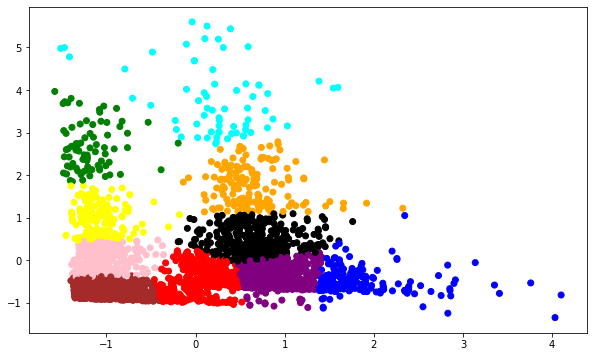

In [42]:

#plot the different clusters with the 2 main features
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show();

In [53]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        #distance.set_value(i, np.linalg.norm(Xa-Xb))
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

C:\Users\shubhangi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


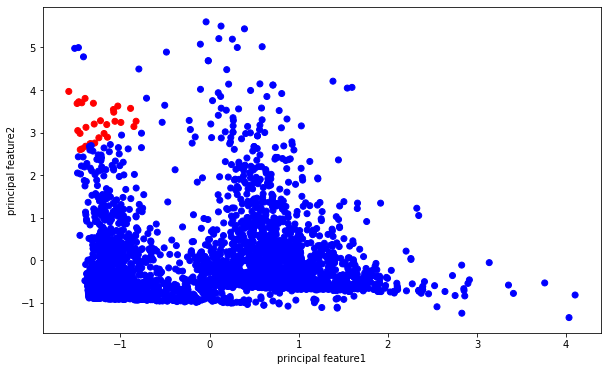

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [55]:
df.anomaly1.value_counts()


0    3018
1      30
Name: anomaly1, dtype: int64

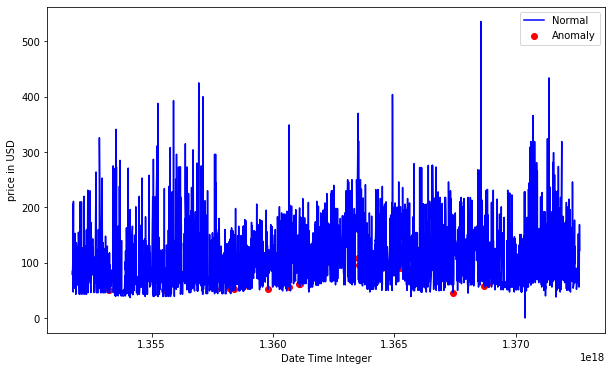

In [56]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly1'] == 1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('price in USD')
plt.legend()
plt.show();

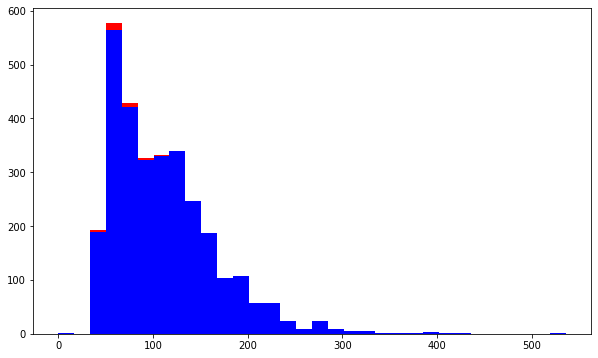

In [57]:
# Visualization of anomaly with re-partition

a = df.loc[df['anomaly1'] == 0, 'price_usd']
b = df.loc[df['anomaly1'] == 1, 'price_usd']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

#### Isolation Forest for anomaly detection.
##### The IsolationForest "isolates" observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This path length, averaged over a forest of such random trees, is a measure of normality and our decision function. Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

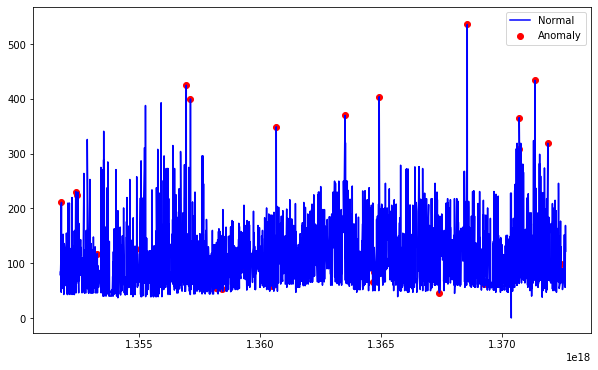

In [58]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

df['anomaly2'] = pd.Series(model.predict(data))
# df['anomaly2'] = df['anomaly2'].map( {1: 0, -1: 1} )

fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label = 'Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [59]:
df['anomaly2'].unique()

array([ 1, -1])

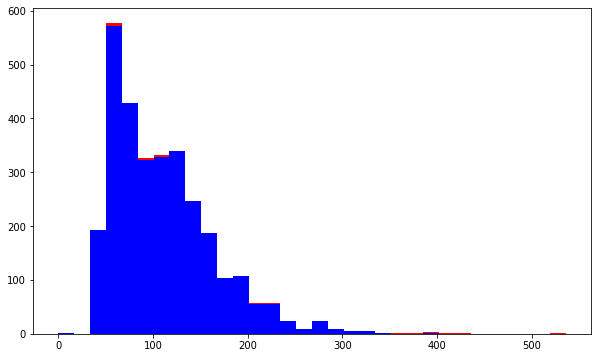

In [60]:
# visualisation of anomaly with avg price repartition
a = df.loc[df['anomaly2'] == 1, 'price_usd']
b = df.loc[df['anomaly2'] == -1, 'price_usd']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

#### Support Vector Machine-Based Anomaly Detection
##### A support vector machine is another effective technique for detecting anomalies. A SVM is typically associated with supervised learning, but OneClassSVM can be used to identify anomalies as an unsupervised problems.

#### One class SVM
#### Unsupervised Outlier Detection.

#### Estimate the support of a high-dimensional distribution.

#### The implementation is based on libsvm.

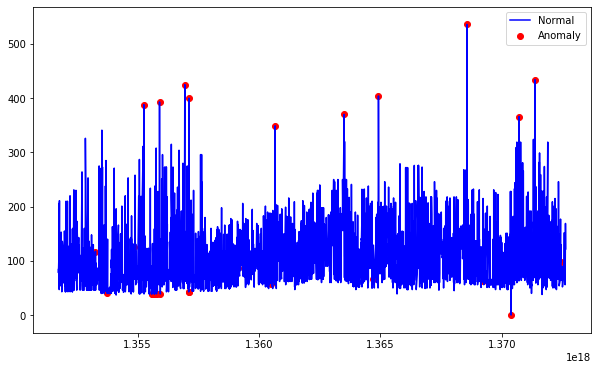

In [61]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
 
df['anomaly3'] = pd.Series(model.predict(data))
# df['anomaly3'] = df['anomaly3'].map( {1: 0, -1: 1} )
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly3'] == -1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label ='Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

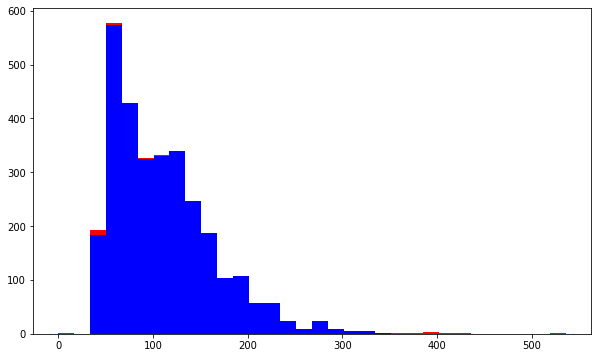

In [62]:
a = df.loc[df['anomaly3'] == 1, 'price_usd']
b = df.loc[df['anomaly3'] == -1, 'price_usd']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

### Anomaly Detection using Gaussian Distribution

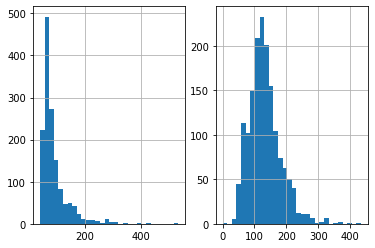

In [63]:
df_class0 = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
df_class1 = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

fig, axs = plt.subplots(1,2)
df_class0.hist(ax=axs[0], bins=30)
df_class1.hist(ax=axs[1], bins=30);

In [64]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class0.values.reshape(-1,1)
envelope.fit(X_train)
df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(X_train)
df_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class1.values.reshape(-1,1)
envelope.fit(X_train)
df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(X_train)
df_class1['anomaly'] = envelope.predict(X_train)

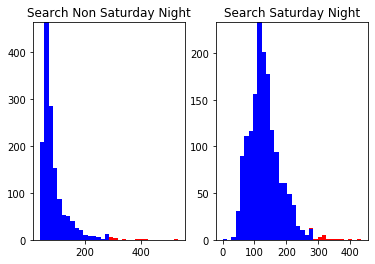

In [65]:
# plot the price repartition by categories with anomalies
a0 = df_class0.loc[df_class0['anomaly'] == 1, 'price_usd']
b0 = df_class0.loc[df_class0['anomaly'] == -1, 'price_usd']

a2 = df_class1.loc[df_class1['anomaly'] == 1, 'price_usd']
b2 = df_class1.loc[df_class1['anomaly'] == -1, 'price_usd']

fig, axs = plt.subplots(1,2)
axs[0].hist([a0,b0], bins=32, stacked=True, color=['blue', 'red'])
axs[1].hist([a2,b2], bins=32, stacked=True, color=['blue', 'red'])
axs[0].set_title("Search Non Saturday Night")
axs[1].set_title("Search Saturday Night")
plt.show();

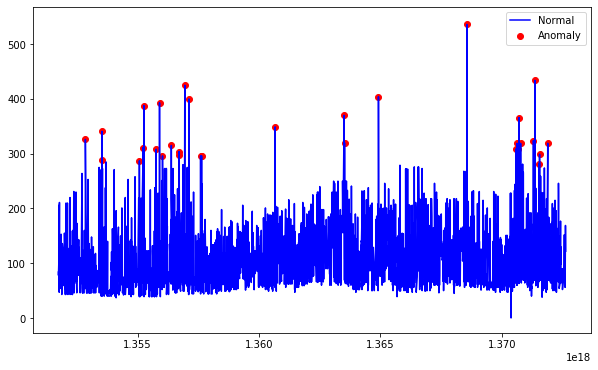

In [66]:
# add the data to the main 
df_class = pd.concat([df_class0, df_class1])
df['anomaly5'] = df_class['anomaly']
# df['anomaly5'] = np.array(df['anomaly22'] == -1).astype(int)
fig, ax = plt.subplots(figsize=(10, 6))
a = df.loc[df['anomaly5'] == -1, ('date_time_int', 'price_usd')] #anomaly
ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label='Anomaly')
plt.legend()
plt.show();

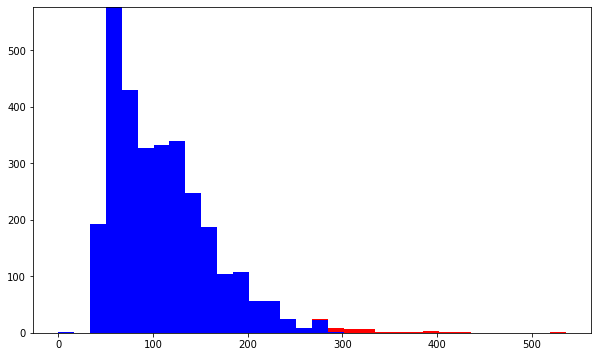

In [67]:
a = df.loc[df['anomaly5'] == 1, 'price_usd']
b = df.loc[df['anomaly5'] == -1, 'price_usd']

fig, axs = plt.subplots(figsize=(10, 6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

## Because our anomaly detection is unsupervised learning. After building the models, we have no idea how well it is doing as we have nothing to test it against. Hence, the results of those methods need to be tested in the field before placing them in the critical path.